In [1]:
# Machine Learning Assignment 1
# Author: Jaemin Lee
# Due: 9/20/2019

# import packages needed

%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score
from scipy.stats import mode

import sklearn
import scipy.cluster.hierarchy as sch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# open dataset
df = pd.read_csv("C:/Users/jaemi/Desktop/CS 4375/Homework 1/mnist.csv")

In [3]:
# separate class label
true_labels = df.loc[:,'label']

In [4]:
# to check the number of rows and columns (8 by 785)
df.shape

(10000, 785)

In [5]:
# print labels
# print(train.loc[:,'label']) 
# print(train.iloc[:,0])  # both the same
# train.iloc[:,0]
print(df.iloc[:, 1:].head(10))
df = df.iloc[:, 1:]

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0       0       0       0       0   
6       0       0       0       0       0       0       0       0       0   
7       0       0       0       0       0       0       0       0       0   
8       0       0       0       0       0       0       0       0       0   
9       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0

In [6]:
# fit data into 2D using PCA (technique for dimensionality reduction)
pca_2D = PCA(n_components = 2).fit_transform(df)
print(pca_2D.shape)

(10000, 2)


In [7]:
# fit into the kmeans clustering algorithms
kmeans = KMeans(n_clusters = 10).fit(df)

In [8]:
# show the parameters of kmeans object by default
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
print(kmeans.cluster_centers_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
train_label=kmeans.labels_

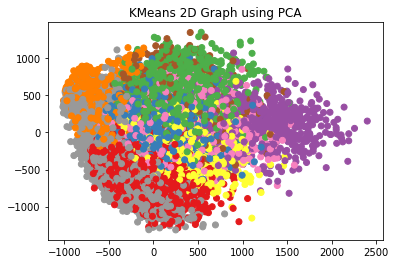

In [11]:
# visualization of the clusters generated by the kmeans algorithm
plt.title("KMeans 2D Graph using PCA")
plt.scatter(pca_2D[:,0], pca_2D[:,1], color = plt.cm.Set1(train_label))
plt.show()

In [12]:
# fit data into 3D using TSNE (dimensionality-reduction technique)
tsne_3D = TSNE(n_components=3).fit_transform(df)

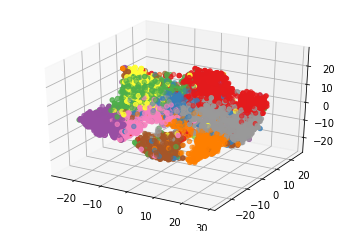

In [13]:
# visualization of the clusters generated by the kmeans algorithm
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.text(1000, -1000, 3250, "3D Graph for KMeans")
ax.scatter(tsne_3D[:,0], tsne_3D[:,1], tsne_3D[:,2], color = plt.cm.Set1(train_label))


In [14]:
clust = kmeans.fit_predict(df)

In [15]:
# function that map KMeans cluster numbers to the actual labels
def mapLabels(clust, true_labels):
    labels = np.zeros_like(clust)
    for i in range(10):
        mask = (clust == i)
        labels[mask] = mode(true_labels[mask])[0]
    return labels

print("KMeans Accuracy Score is:", accuracy_score(true_labels, mapLabels(clust, true_labels)))

KMeans Accuracy Score is: 0.5764


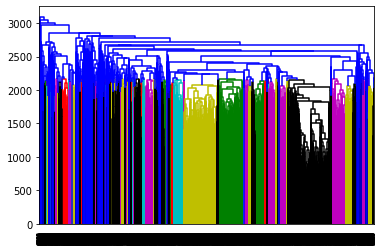

In [22]:
# create dendrogram of hierachical clustering using average link
dendrogram = sch.dendrogram(sch.linkage(df, method='average'))

# create clusters using hierachical methods
hc = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='average')

In [23]:
# label for hierarchical clustering
hc_label = hc.fit_predict(df)

In [16]:
# train the model using DBSCAN
db = DBSCAN(eps = 1300, min_samples=10)

In [17]:
# fit the prediction for dbscan clusters
clusters_db = db.fit_predict(df)

In [18]:
# dbscan labels
db_labels = clusters_db

Text(0.5, 1.0, 'DBSCAN 2D Graph')

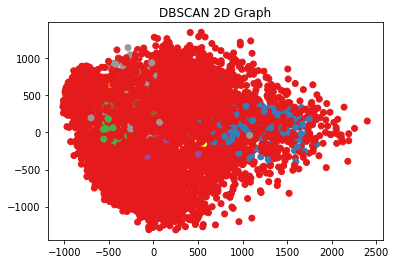

In [19]:
# plot the clusters
plt.scatter(pca_2D[:,0], pca_2D[:,1], c = plt.cm.Set1(db_labels))

plt.title("DBSCAN 2D Graph")

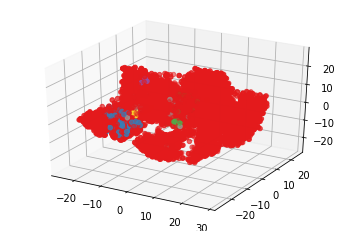

In [20]:
# visualization of the clusters generated by the kmeans algorithm
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.text(1000, -1000, 3250, "3D Graph for DBSCAN")
ax.scatter(tsne_3D[:,0], tsne_3D[:,1], tsne_3D[:,2], c = plt.cm.Set1(db_labels))


In [21]:
print("DBSCAN Accuracy Score is:", accuracy_score(true_labels, mapLabels(clusters_db, true_labels)))

DBSCAN Accuracy Score is: 0.2161


In [25]:
print("Hierarchical Accuracy Score is:", accuracy_score(true_labels, mapLabels(hc_label, true_labels)))

Hierarchical Accuracy Score is: 0.2504
